In [1]:
!pip install -q xmltodict plotly hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=da5c6feac39d474daa83c3b712aa6bdecee6773c42c7af57eaeb78ad33eda302
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [2]:
import urllib, urllib.request, xmltodict
from datetime import datetime
from time import mktime
import pprint
import torch

In [3]:
import pandas as pd

In [4]:
def get_title_abs_arxiv(url):
    if 'arxiv' not in url: return -1,{}
    if 'pdf' in url: arxiv_id=''.join(url.split('pdf')[-2:-1])[1:-1]
    else: arxiv_id=url.split('/')[-1]
    query_url='http://export.arxiv.org/api/query?id_list='+arxiv_id
    data_dict = xmltodict.parse(urllib.request.urlopen(query_url).read())['feed']
    return 0,{'title':data_dict['entry']['title'],'abstract':' '.join(data_dict['entry']['summary'].split('\n'))}

In [7]:
def fetch_daily_arxiv_papers(cat='cs.LG'):
    feedurl=f'https://rss.arxiv.org/rss/{cat}'
    feed=feedparser.parse(feedurl)
    datestr=datetime.fromtimestamp(mktime(feed['feed']['published_parsed'])).strftime('%d-%b-%Y')
    daily_papers=[]
    for e in feed['entries']:
        paper_entry={'id':e['id'],'title':e['title'],
                     'abstract':' '.join(e['summary'].split('\n')),
                     'date':datestr}
        daily_papers.append(paper_entry)
    return daily_papers

In [5]:
train_urls = pd.read_csv('/kaggle/input/aml-a3-data/papers_of_interest.csv')

In [6]:
train_urls

,no,url
0,1,https://arxiv.org/pdf/2209.11142.pdf
1,2,https://arxiv.org/pdf/2212.02475.pdf
2,3,https://arxiv.org/pdf/2211.16564.pdf
3,4,https://arxiv.org/abs/1803.05316
4,5,https://arxiv.org/abs/2206.08896
...,...,...
308,309,https://arxiv.org/pdf/2401.03006.pdf
309,310,https://arxiv.org/pdf/2403.04732.pdf
310,311,https://arxiv.org/pdf/2404.08819.pdf
311,312,https://arxiv.org/pdf/2404.11483v1.pdf


In [7]:
train_content = []
for url in train_urls['url']:
    status, content = get_title_abs_arxiv(url)
    # print(content)
    # break
    if status == 0:
        train_content.append(content)
    else:
        print(f"Failed to fetch content for {url}")

In [12]:
# convert train_content to a pandas dataframe
df = pd.DataFrame(train_content)

In [13]:
df.to_csv('/kaggle/working/train_content.csv', index=False)

In [15]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')
model = AutoModel.from_pretrained('allenai/specter2_base')

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/717k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--allenai--specter2_base/snapshots/88fcaeab633f2cadae64ee13aa822db1917d5a05/vocab.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--allenai--specter2_base/snapshots/88fcaeab633f2cadae64ee13aa822db1917d5a05/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--allenai--specter2_base/snapshots/88fcaeab633f2cadae64ee13aa822db1917d5a05/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--allenai--specter2_base/snapshots/88fcaeab633f2cadae64ee13aa822db1917d5a05/tokenizer_config.json


config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--allenai--specter2_base/snapshots/88fcaeab633f2cadae64ee13aa822db1917d5a05/config.json
Model config BertConfig {
  "_name_or_path": "allenai/specter2_base",
  "adapters": {
    "adapters": {},
    "config_map": {},
    "fusion_config_map": {},
    "fusions": {}
  },
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.39.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31090
}



pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--allenai--specter2_base/snapshots/88fcaeab633f2cadae64ee13aa822db1917d5a05/pytorch_model.bin
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
All model checkpoint weights were used when initializing BertModel.

All the weights of BertModel were initialized from the model checkpoint at allenai/specter2_base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertModel for predictions without further training.


In [16]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)

In [17]:
model.cuda()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31090, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [18]:
dataset

Dataset({
    features: ['title', 'abstract'],
    num_rows: 313
})

In [19]:
len(dataset[0]['title'].split())

5

In [20]:
len((tokenizer(dataset['title'][0]))['input_ids'])


8

In [23]:
embeddings=[]

for i in range(len(dataset)):
    input_string = dataset['title'][i] + ' ' + dataset['abstract'][i]
    tokenized_input = tokenizer(input_string, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    tokenized_input = {k: v.cuda() for k, v in tokenized_input.items()}
    with torch.no_grad():
        outputs = model(**tokenized_input)
        last_hidden_states = outputs.last_hidden_state
        pooled_output = outputs.pooler_output
        # embedding = outputs.last_hidden_state[:,1,-1,:].squeeze(0)
        # print(last_hidden_states.shape)
        # print(pooled_output.shape)
        embeddings.append(pooled_output)
        # print(pooled_output)
        # print(embedding.shape)
        # break

In [24]:
import torch

# Stack the tensors along a new dimension
stacked_embeddings = torch.stack(embeddings)

# Compute the mean along that dimension
mean_embeddings = torch.mean(stacked_embeddings, dim=0)

In [191]:
unlabelled_data_all = pd.read_csv('data/daily_arxiv_papers.csv') 

In [25]:
unlabelled_data = pd.read_csv('/kaggle/input/aml-a3-data/daily_arxiv_papers.csv') 

ids = []
for i in range(len(unlabelled_data)):
    if unlabelled_data['id'][i] == 'id':
        ids.append(i)


# remove the rows with id , title , abstract, date as a row
unlabelled_data = unlabelled_data.drop(ids)

# make the indices start from 0
unlabelled_data = unlabelled_data.reset_index(drop=True)

# remove arXiv:2403.19669v1 Announce Type: new  Abstract: from the abstract
abstracts = unlabelled_data['abstract']
# abstracts

In [26]:
new_abstracts = []
for abstract in abstracts:
    abstract = abstract.split('Abstract: ')
    if len(abstract) > 1:
        abstract = abstract[1]
    else:
        abstract = abstract[0]
    new_abstracts.append(abstract)
# new_abstracts

In [27]:
# new abstracts is new absracts for unlabeled data
unlabelled_data['abstract'] = new_abstracts

In [28]:
unlabelled_data.drop_duplicates(subset=['title'], inplace=True)

In [29]:
unlabelled_embeddings=[]
unlabelled_dataset = Dataset.from_pandas(unlabelled_data)

unlabelled_dataset

Dataset({
    features: ['id', 'title', 'abstract', 'date', '__index_level_0__'],
    num_rows: 836
})

In [30]:
for i in range(len(unlabelled_dataset)):
    input_string = unlabelled_dataset['title'][i] + ' ' + unlabelled_dataset['abstract'][i]
    tokenized_input = tokenizer(input_string, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    tokenized_input = {k: v.cuda() for k, v in tokenized_input.items()}
    with torch.no_grad():
        outputs = model(**tokenized_input)
        last_hidden_states = outputs.last_hidden_state
        pooled_output = outputs.pooler_output
        # embedding = outputs.last_hidden_state[:,1,-1,:].squeeze(0)
        # print(last_hidden_states.shape)
        # print(pooled_output.shape)
        unlabelled_embeddings.append(pooled_output)
        # print(pooled_output)
        # print(embedding.shape)
        # break

In [31]:
# compute euclidean distance between mean_embeddings and unlabelled_embeddings
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

mean_embeddings = mean_embeddings.cpu().numpy()
unlabelled_embeddings = torch.stack(unlabelled_embeddings)
unlabelled_embeddings = unlabelled_embeddings.cpu().numpy()
print(mean_embeddings.shape)
print(unlabelled_embeddings.shape)
mean_embeddings = mean_embeddings.squeeze(0)
unlabelled_embeddings = unlabelled_embeddings.squeeze(1)
distances = euclidean_distances(mean_embeddings.reshape(1,-1), unlabelled_embeddings)
distances = distances.reshape(-1)
distances



(1, 768)
(836, 1, 768)


array([4.5677867, 4.5405183, 5.093876 , 4.8318744, 5.181633 , 4.868515 ,
       5.4974895, 5.9082217, 4.2132583, 5.625835 , 5.6464567, 5.361003 ,
       3.8444564, 4.510024 , 4.048145 , 4.558012 , 4.713201 , 4.0647397,
       5.8034654, 4.944011 , 5.4197087, 4.3255076, 6.051324 , 4.6337714,
       4.7869005, 5.82183  , 5.487824 , 5.0715737, 4.435207 , 3.9957836,
       5.117767 , 5.985867 , 4.779816 , 5.999028 , 7.5814557, 3.7929745,
       4.933277 , 4.2787814, 4.883603 , 5.0088716, 4.5388517, 4.6323543,
       5.421605 , 5.5741982, 6.125299 , 4.20913  , 5.3059673, 4.454696 ,
       4.9490814, 4.3075237, 3.573104 , 5.037025 , 5.049589 , 3.2222817,
       4.1869597, 4.7607784, 4.989899 , 3.8067284, 4.810915 , 4.0683637,
       3.8329496, 4.044308 , 4.720991 , 4.6360154, 3.4335651, 5.6836324,
       4.8225384, 6.6259556, 5.9705915, 4.854149 , 5.262266 , 5.2582293,
       5.540558 , 5.6400595, 5.584733 , 5.9848485, 5.493728 , 4.848005 ,
       5.0640154, 4.989391 , 5.355492 , 4.824261 , 

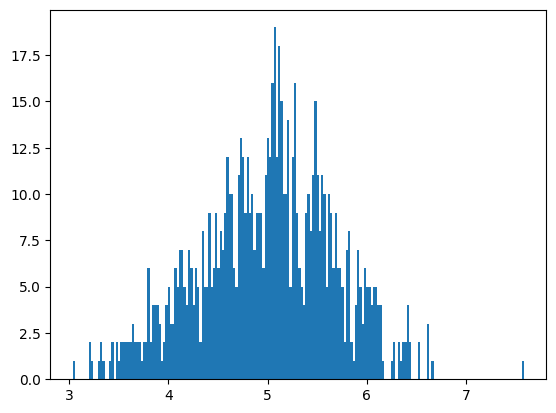

In [32]:
# histogram of distances
import matplotlib.pyplot as plt

plt.hist(distances, bins=200)
plt.show()


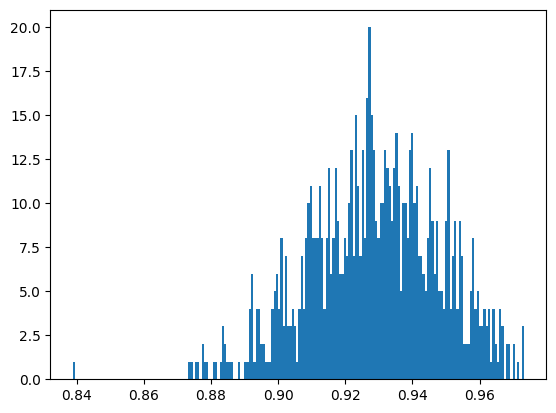

In [33]:
# compute cosine similarity between mean_embeddings and unlabelled_embeddings
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(mean_embeddings.reshape(1,-1), unlabelled_embeddings)
cosine_similarities = cosine_similarities.reshape(-1)
cosine_similarities

# histogram of cosine similarities
plt.hist(cosine_similarities, bins=200)
plt.show()


(313, 1, 768)


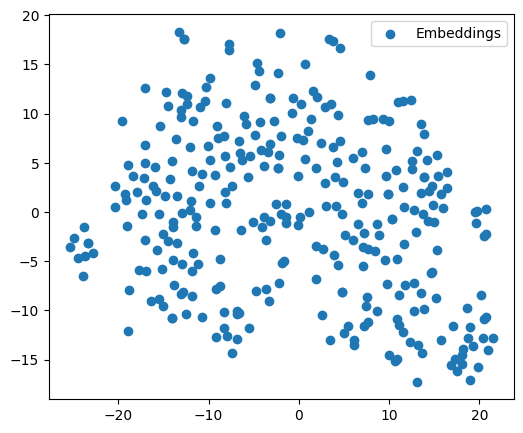

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE object
tsne = TSNE(n_components=2, random_state=0)

# convert embeddings to numpy array
stacked_embeddings = torch.stack(embeddings)
embeddings_np = stacked_embeddings.cpu().numpy()

print(embeddings_np.shape)

# Fit the t-SNE object to the data
embeddings_tsne = tsne.fit_transform(embeddings_np.squeeze(1))
unlabelled_embeddings_tsne = tsne.fit_transform(unlabelled_embeddings)

# Plot the t-SNE embeddings
plt.figure(figsize=(6, 5))

# Plot embeddings
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], label='Embeddings')

# Plot unlabelled embeddings
# plt.scatter(unlabelled_embeddings_tsne[:, 0], unlabelled_embeddings_tsne[:, 1], label='Unlabelled Embeddings')

plt.legend()
plt.show()

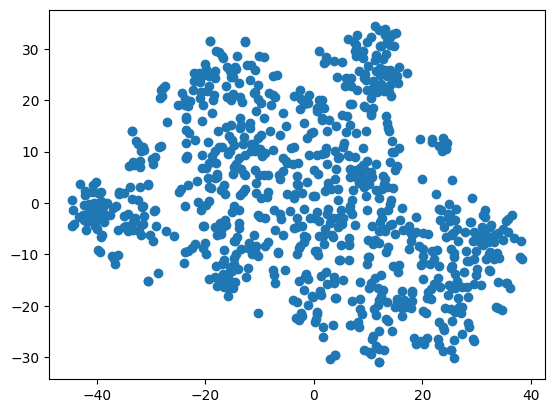

In [35]:
plt.scatter(unlabelled_embeddings_tsne[:, 0], unlabelled_embeddings_tsne[:, 1], label='Unlabelled Embeddings')
plt.show()

In [36]:
# convert embeddings to numpy array
stacked_embeddings = torch.stack(embeddings)
embeddings_np = stacked_embeddings.cpu().numpy()

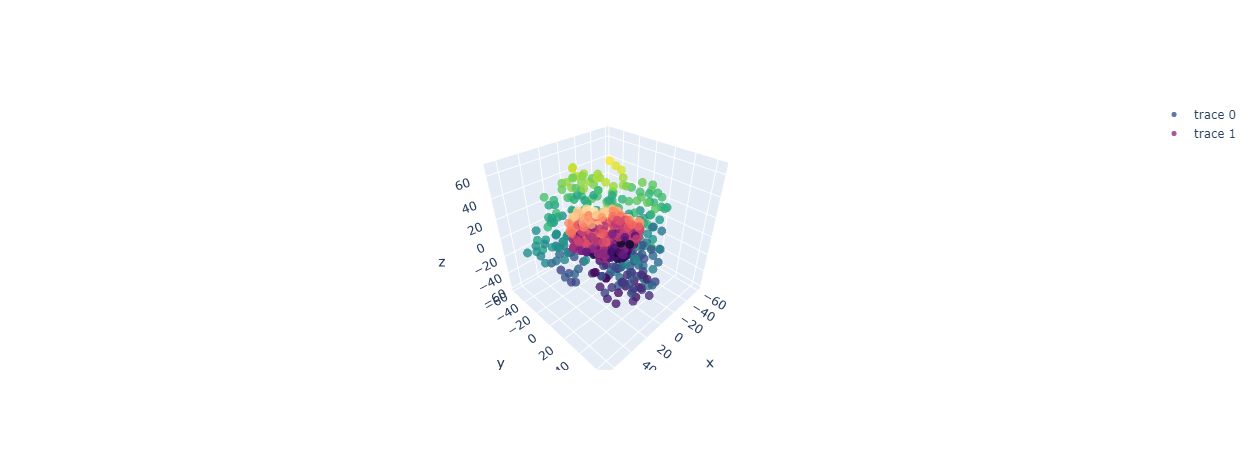

In [127]:
# %matplotlib inline
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Create a t-SNE object with 3 components
# tsne = TSNE(n_components=3, random_state=0)

# # Fit the t-SNE object to the data
# embeddings_tsne = tsne.fit_transform(embeddings_np.squeeze(1))   
# unlabelled_embeddings_tsne = tsne.fit_transform(unlabelled_embeddings)

# # Create a 3D plot
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the t-SNE embeddings
# ax.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], embeddings_tsne[:, 2], label='Embeddings')

# # Plot the unlabelled t-SNE embeddings
# # ax.scatter(unlabelled_embeddings_tsne[:, 0], unlabelled_embeddings_tsne[:, 1], unlabelled_embeddings_tsne[:, 2], label='Unlabelled Embeddings')

# plt.legend()
# plt.show()

import plotly.graph_objects as go

# Create a t-SNE object with 3 components
tsne = TSNE(n_components=3, random_state=0)

# Fit the t-SNE object to the data
embeddings_tsne = tsne.fit_transform(embeddings_np.squeeze(1))   
unlabelled_embeddings_tsne = tsne.fit_transform(unlabelled_embeddings)

# Create a 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_tsne[:, 0],
    y=embeddings_tsne[:, 1],
    z=embeddings_tsne[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=embeddings_tsne[:, 2],  # set color to third dimension
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

fig.add_trace(go.Scatter3d(
    x=unlabelled_embeddings_tsne[:, 0],
    y=unlabelled_embeddings_tsne[:, 1],
    z=unlabelled_embeddings_tsne[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=unlabelled_embeddings_tsne[:, 2],  # set color to third dimension
        colorscale='magma',   # choose a colorscale
        opacity=0.8
    )
))

# Plot the unlabelled t-SNE embeddings
# fig = go.Figure(data=[go.Scatter3d(
#     x=unlabelled_embeddings_tsne[:, 0],
#     y=unlabelled_embeddings_tsne[:, 1],
#     z=unlabelled_embeddings_tsne[:, 2],
#     mode='markers',
#     marker=dict(
#         size=5,
#         color=unlabelled_embeddings_tsne[:, 2],  # set color to third dimension
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )])

fig.show()

In [41]:
embeddings_np.squeeze(1).shape

(313, 768)

In [42]:
import hdbscan
import numpy as np

# Concatenate the labelled and unlabelled data
combined_data = np.concatenate((embeddings_np.squeeze(1), unlabelled_embeddings))

# Create an HDBSCAN object
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

# Fit the HDBSCAN object to the data
cluster_labels = clusterer.fit_predict(combined_data)

# Now, 'cluster_labels' is an array of cluster labels. Unclustered points are labeled as -1.

In [46]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=combined_data[:, 0],
    y=combined_data[:, 1],
    z=combined_data[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,  # set color to cluster labels
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
fig.show()

In [ ]:
import plotly.graph_objects as go

# Create a t-SNE object with 3 components
tsne = TSNE(n_components=3, random_state=0)

# Fit the t-SNE object to the data
embeddings_tsne = tsne.fit_transform(embeddings_np.squeeze(1))   
unlabelled_embeddings_tsne = tsne.fit_transform(unlabelled_embeddings)

# Create a 3D plot
fig =add_bar go.Figure(data=[go.Scatter3d(
    x=embeddings_tsne[:, 0],
    y=embeddings_tsne[:, 1],
    z=embeddings_tsne[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=embeddings_tsne[:, 2],  # set color to third dimension
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Plot the unlabelled t-SNE embeddings
# fig.add_trace(go.Scatter3d(
#     x=unlabelled_embeddings_tsne[:, 0],
#     y=unlabelled_embeddings_tsne[:, 1],
#     z=unlabelled_embeddings_tsne[:, 2],
#     mode='markers',
#     marker=dict(
#         size=6,
#         color=unlabelled_embeddings_tsne[:, 2],  # set color to third dimension
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# ))

fig.show()

In [ ]:
from sklearn.svm import OneClassSVM

# Generate embeddings for positive examples
pos_embeddings = embeddings
pos_embeddings_cpu = [emb.cpu().numpy() for emb in pos_embeddings]
pos_embeddings_np = [np.squeeze(emb, axis=0) for emb in pos_embeddings_cpu]

# Train One-Class SVM
one_class_svm = OneClassSVM(nu=0.75, kernel="rbf", gamma="auto")  # Adjust parameters as needed
one_class_svm.fit(pos_embeddings_np)

# Generate embeddings for unlabeled data
unlabeled_embeddings = unlabelled_embeddings
# unlabeled_embeddings_cpu = [emb.cpu().numpy() for emb in unlabeled_embeddings]
# unlabeled_embeddings_np = [np.squeeze(emb, axis=0) for emb in unlabeled_embeddings_cpu]

# Predict binary labels for unlabeled examples
predicted_labels = one_class_svm.predict(unlabeled_embeddings)
predicted_labels_svm = ["yes" if label == 1 else "no" for label in predicted_labels]



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm

# Define the weighted logistic regression model
class WeightedLogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(WeightedLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 128)
        self.linear2 = nn.Linear(128, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear2(self.linear(x)))

# Generate embeddings for positive and unlabeled examples
pos_embeddings = embeddings
unlabeled_embeddings = unlabelled_embeddings

# Estimate the prior probability of positive examples
pos_prior = len(pos_embeddings) / (len(pos_embeddings) + len(unlabeled_embeddings))

# Train the weighted logistic regression model
model1 = WeightedLogisticRegression(input_dim=768).to("cuda")
criterion = nn.BCELoss(reduction="none")
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in tqdm(range(10)):
    losses = []
    for i in range(len(pos_embeddings)):
        optimizer.zero_grad()
        pos_preds = model1(pos_embeddings[i])
        # unlabeled_preds = model(unlabeled_embeddings)

        # Compute weighted loss
        pos_loss = criterion(pos_preds, torch.ones_like(pos_preds))
        # unlabeled_loss = criterion(unlabeled_preds, torch.full_like(unlabeled_preds, pos_prior))
        # loss = (pos_loss.sum() + (1 - pos_prior) / pos_prior * unlabeled_loss.sum()) / len(pos_embeddings)

        pos_loss.backward()
        optimizer.step()

        losses.append(pos_loss.item())

In [ ]:
# Use the trained model to predict likelihood scores for unlabeled examples
with torch.no_grad():
    unlabeled_preds = []
    for i in range(len(unlabeled_embeddings)):
        unlabeled_pred = model1(unlabeled_embeddings[i])
        unlabeled_preds.append(unlabeled_pred)

    predicted_labels = (unlabeled_preds.squeeze() > 0.5).long()  # Threshold at 0.5
    predicted_labels_pu = ["yes" if label == 1 else "no" for label in predicted_labels]

# Assign predicted labels to unlabeled data
# for paper, label in zip(unlabelled_data, predicted_labels):
#     paper["predicted_label"] = label

print(predicted_labels_pu)

torch.Size([1, 1])

In [132]:
#count number of yes and no in predicted_labels_svm
yes = predicted_labels_svm.count('yes')
no = predicted_labels_svm.count('no')
print(yes)
print(no)

23

813


In [163]:
import torch
from torch import nn
from torch.optim import Adam

class Autoencoder(nn.Module):
    def __init__(self, embedding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Assuming pos_embeddings is a tensor containing your positive embeddings
# pos_embeddings = pos_embeddings.cpu().numpy()

# Convert to PyTorch tensor and move to device
device = "cuda"
# pos_embeddings = torch.tensor(pos_embeddings, dtype=torch.float32).to(device)

# Create and train the autoencoder
autoencoder = Autoencoder(768).to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001)

# Training loop
autoencoder.train()
for epoch in range(100):  # Adjust as needed
    for i in range(len(pos_embeddings)):
        pos_embedding = pos_embeddings[i].to(device)
        optimizer.zero_grad()
        outputs = autoencoder(pos_embedding)
        loss = criterion(outputs, pos_embedding)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{100}, Loss: {loss.item()}")



Epoch 1/100, Loss: 0.02201428823173046

Epoch 2/100, Loss: 0.021511655300855637

Epoch 3/100, Loss: 0.018608149141073227

Epoch 4/100, Loss: 0.016311785206198692

Epoch 5/100, Loss: 0.01582060009241104

Epoch 6/100, Loss: 0.01434583030641079

Epoch 7/100, Loss: 0.01433035358786583

Epoch 8/100, Loss: 0.01435350626707077

Epoch 9/100, Loss: 0.014749306254088879

Epoch 10/100, Loss: 0.014249943196773529

Epoch 11/100, Loss: 0.014380168169736862

Epoch 12/100, Loss: 0.013113461434841156

Epoch 13/100, Loss: 0.013608838431537151

Epoch 14/100, Loss: 0.013718320056796074

Epoch 15/100, Loss: 0.012296493165194988

Epoch 16/100, Loss: 0.012148055247962475

Epoch 17/100, Loss: 0.011599978432059288

Epoch 18/100, Loss: 0.013496499508619308

Epoch 19/100, Loss: 0.01080881617963314

Epoch 20/100, Loss: 0.011865931563079357

Epoch 21/100, Loss: 0.011111950501799583

Epoch 22/100, Loss: 0.010855848900973797

Epoch 23/100, Loss: 0.011399026028811932

Epoch 24/100, Loss: 0.011095026507973671

Epoch 2

In [164]:
# Now, you can use the trained autoencoder to reconstruct the unlabeled embeddings
# unlabeled_embeddings = unlabeled_embeddings.cpu().numpy()
# unlabeled_embeddings = torch.tensor(unlabeled_embeddings, dtype=torch.float32).to(device)

# Set the model to evaluation mode
autoencoder.eval()

# Reconstruct the unlabeled embeddings
reconstructed_embeddings = []
for i in range(len(unlabeled_embeddings)):
    unlabeled_embedding = torch.tensor(unlabeled_embeddings[i]).to(device)
    reconstructed_embedding = autoencoder(unlabeled_embedding)
    reconstructed_embeddings.append(reconstructed_embedding)

In [169]:
# Compute the reconstruction error
errors = []
for i in range(len(unlabeled_embeddings)):
    error = np.mean((unlabeled_embeddings[i] - reconstructed_embeddings[i].cpu().detach().numpy())**2)
    errors.append(error)

# Set a threshold for the reconstruction error
threshold = 0.01  # Adjust as needed

# Predict binary labels for unlabeled examples
predicted_labels = ["yes" if error.item() < threshold else "no" for error in errors]

In [170]:
yes = predicted_labels.count('yes')
no = predicted_labels.count('no')
print(yes)
print(no)

15

821


In [182]:
# predict yes/no on unlabelled embeddings based on threshold
threshold = 0.90
predictions = []
for i in range(len(cosine_similarities)):
    if cosine_similarities[i] > threshold:
        predictions.append('yes')
    else:
        predictions.append('no')

In [183]:
yes = predictions.count('yes')
no = predictions.count('no')
print(yes)
print(no)

774

62


In [186]:
# go through the unlabbeled data, count the number of samples that contain the word neural in it
neural_count = 0
for abstract in unlabelled_data['abstract']:
    if 'neural' in abstract:
        neural_count += 1

print(neural_count)

140


In [189]:
unlabelled_data['predicted_labels'] = predicted_labels_svm
unlabelled_data

,id,title,abstract,date,predicted_labels
0,oai:arXiv.org:2403.19669v1,Analyzing the Roles of Language and Vision in ...,Does language help make sense of the visual wo...,01-Apr-2024,no
1,oai:arXiv.org:2403.19717v1,A Picture is Worth 500 Labels: A Case Study of...,Mobile apps have embraced user privacy by movi...,01-Apr-2024,no
2,oai:arXiv.org:2403.19721v1,Computationally and Memory-Efficient Robust Pr...,"In the current data-intensive era, big data ha...",01-Apr-2024,no
3,oai:arXiv.org:2403.19792v1,MAPL: Model Agnostic Peer-to-peer Learning,Effective collaboration among heterogeneous cl...,01-Apr-2024,no
4,oai:arXiv.org:2403.19800v1,Gegenbauer Graph Neural Networks for Time-vary...,Reconstructing time-varying graph signals (or ...,01-Apr-2024,no
...,...,...,...,...,...
981,http://arxiv.org/abs/2404.16283v1,Andes: Defining and Enhancing Quality-of-Exper...,The advent of large language models (LLMs) has...,2024-04-25,no
982,http://arxiv.org/abs/2404.16281v1,Timely Communications for Remote Inference,"In this paper, we analyze the impact of data f...",2024-04-25,no
983,http://arxiv.org/abs/2404.16280v1,An Efficient Reconstructed Differential Evolut...,Complex single-objective bounded problems are ...,2024-04-25,no
984,http://arxiv.org/abs/2404.16277v1,Causally Inspired Regularization Enables Domai...,Given a causal graph representing the data-gen...,2024-04-25,no


In [193]:
df.to_csv('saved_pred_svm.csv', index=False)